# Word2Vec 
Esta vez, con mejor preprocesamiento

In [1]:
import os
import pandas as pd
import nltk
from gensim.models.word2vec import Word2Vec

df = pd.read_csv('movies_reviews.csv')#, header=None)
df.columns = ['text', 'sent']

En el procesamiento, se normalizan los emoticons

In [2]:
import re

def preprocesador(text):
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    text = text[:len(text)-1]
    return text

df['text'] = df['text'].apply(preprocesador)
df.head(5)

text  sent
0  in 1974 the teenager martha moxley maggie grac...     1
1  ok so i really like kris kristofferson and his...     0
2   spoiler do not read this if you think about w...     0
3  hi for all the people who have seen this wonde...     1
4  i recently bought the dvd forgetting just how ...     0

Tokenizamos el corpus y se utiliza Word2Vec.

In [3]:
corpus = df['text'].values.tolist()

tok_corp = [nltk.word_tokenize(sent) for sent in corpus]
print(tok_corp)

[['in',
  '1974',
  'the',
  'teenager',
  'martha',
  'moxley',
  'maggie',
  'grace',
  'moves',
  'to',
  'the',
  'high',
  'class',
  'area',
  'of',
  'belle',
  'haven',
  'greenwich',
  'connecticut',
  'on',
  'the',
  'mischief',
  'night',
  'eve',
  'of',
  'halloween',
  'she',
  'was',
  'murdered',
  'in',
  'the',
  'backyard',
  'of',
  'her',
  'house',
  'and',
  'her',
  'murder',
  'remained',
  'unsolved',
  'twenty',
  'two',
  'years',
  'later',
  'the',
  'writer',
  'mark',
  'fuhrman',
  'christopher',
  'meloni',
  'who',
  'is',
  'a',
  'former',
  'la',
  'detective',
  'that',
  'has',
  'fallen',
  'in',
  'disgrace',
  'for',
  'perjury',
  'in',
  'o',
  'j',
  'simpson',
  'trial',
  'and',
  'moved',
  'to',
  'idaho',
  'decides',
  'to',
  'investigate',
  'the',
  'case',
  'with',
  'his',
  'partner',
  'stephen',
  'weeks',
  'andrew',
  'mitchell',
  'with',
  'the',
  'purpose',
  'of',
  'writing',
  'a',
  'book',
  'the',
  'locals',
  '

Se utiliza el enfoque skip-gram con una ventana de 3, una dimension semántica de 100 y un learning rate de 0.001 con 10 epocas.
Además guardamos el modelo.

In [4]:
import os.path

if not os.path.isfile('./Word2Vec_5G'):
    model = Word2Vec(tok_corp, size=100, window=3, min_count=1, workers=4, sg=1, alpha=0.001, iter=10)
    model.save('Word2Vec_5G')

Cargamos el modelo

In [5]:
import gensim

model = gensim.models.Word2Vec.load('Word2Vec_5G')

Se guardan los vectores del vocabulario en word_vectors

In [6]:
word_vectors = model.wv

In [7]:
words = list(word_vectors.vocab)
len(words)#numero de tokens

102487

Accedemos al documento 11 para mostrarlo

In [8]:
df.loc[9][0]

'this movie is directed by renny harlin the finnish miracle stallone is gabe walker cat and mouse on the mountains with ruthless terrorists renny harlin knows how to direct actionmovie stallone needed this role to get back on track snowy mountain is very good place for action movie and who is better to direct movie where is snow ice cold and bad weather than finnish man action is good music in the film is spectacular the bad guy is john litghow other stars micheal rooker the portrait of serialkiller janine turner strong medicine the is placed in beautiful place and it is very exciting movie overall good movie br br remember extreme ääliöt special collectors edition with good extras comig soon in finland straight to video'

Veamos como es el vector que representa "movie"

In [9]:
x = word_vectors['movie']
x

array([ 0.5300617 , -0.8094543 , -0.00795486, -1.249174  , -0.20462385,
       -0.1190543 , -0.506784  ,  0.7136564 , -0.95734143, -0.08993752,
       -0.6221591 ,  0.9301996 ,  0.18549287, -0.25503716,  0.14787656,
       -0.17128716, -1.0010487 , -0.89433646, -0.35479409, -0.29341826,
       -0.40211615, -0.5222386 ,  0.5981223 , -0.07897621,  1.0708017 ,
        0.36264265,  0.5629712 , -0.94069904, -0.00504634,  0.19596177,
        0.99801254,  0.0187418 ,  0.54609424, -0.12210906, -0.01263676,
       -0.46023503,  0.6226484 ,  0.03248337, -0.33406478, -0.4177077 ,
        0.6102306 ,  0.04508661,  1.088572  , -1.0851489 , -0.87888753,
        0.22180271, -0.06264075, -1.203146  , -0.16052255, -0.31414023,
        0.05171457,  0.9942997 ,  0.6353697 , -0.396829  , -0.43901756,
       -0.87675476, -0.19614018,  0.31304818,  0.5716183 , -0.3393584 ,
       -0.35110036,  0.760624  ,  0.35989562, -0.21716298, -0.19895443,
       -0.29747754,  0.0382603 ,  0.31292057, -0.60169077,  0.34

Calculemos la similitud coseno entre las palabras "dog" "film" y "cat"

In [10]:
y = word_vectors['dog']
z = word_vectors['film']
w = word_vectors['cat']

In [11]:
import math
import numpy as np
from numpy.linalg import norm

def sim_coseno(vec1, vec2):
    dot_prod = vec1.dot(vec2)
    return dot_prod/norm(vec1)/norm(vec2)

In [12]:
#similitud entre "movie" y "dog"
sim_coseno(x, y)

0.81776667

In [13]:
#similitud entre "movie" y "film"
sim_coseno(x, z)

0.9774217

In [14]:
#similitud entre "dog" y "cat"
sim_coseno(y, w)

0.9793316

En la libreria **gensim** está el paquete *most_similar* en la que muestran los tokens más parecidos a uno en específico.

In [15]:
#model.most_similar('cat')[:3]# deprecated
model.wv.most_similar('cat')[:3]

[('wild', 0.9812865853309631),
 ('horse', 0.9812277555465698),
 ('dog', 0.9793314337730408)]

In [16]:
model.wv.most_similar('movie')

[('film', 0.977421760559082),
 ('show', 0.944739580154419),
 ('picture', 0.9361600875854492),
 ('documentary', 0.9308059811592102),
 ('series', 0.9240389466285706),
 ('flick', 0.9203895330429077),
 ('sequel', 0.9193931818008423),
 ('game', 0.9106446504592896),
 ('it', 0.909892201423645),
 ('cinema', 0.9083216786384583)]

In [17]:
model.wv.most_similar('he')[:5]

[('she', 0.9335039854049683),
 ('himself', 0.8873045444488525),
 ('him', 0.843058705329895),
 ('someone', 0.8280739784240723),
 ('father', 0.8279412984848022)]

In [18]:
model.wv.most_similar('king')[:5]

[('master', 0.9551236033439636),
 ('mark', 0.9517534971237183),
 ('author', 0.9498685598373413),
 ('stephen', 0.9493785500526428),
 ('fox', 0.9490586519241333)]

In [19]:
model.wv.most_similar('queen')[:5]

[('prince', 0.9887933731079102),
 ('witch', 0.9831252098083496),
 ('wolf', 0.9827938079833984),
 ('stone', 0.9823174476623535),
 ('fame', 0.9820072650909424)]

## Modelos pre-entrenados
Sin embargo, Google, FB y otras compañias, han pre-entrenado modelos.
Google en específico ha liberado un modelo, entrenado con un corpus muchisimo más grande que con el que estamos experimentando.
El modelo de Google posee un léxico de 3.000.000 tokens

In [20]:
import os
from nlpia.loaders import get_data
# WARNING! SON 3 GB QUE SE OCUPAN DE RAM
wv = get_data("word2vec")

d:\program files\python37\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
d:\program files\python37\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
d:\program files\python37\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
d:\program files\python37\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
INFO:nlpia.constants:Sta

El largo del vocabulario es

In [21]:
len(wv.vocab)

3000000

Las similitud coseno entre las palabras es

In [22]:
sim_coseno(wv['cat'], wv['dog'])

0.76094574

In [23]:
sim_coseno(wv['movie'], wv['film'])

0.8676771

El tamaño de este modelo es

In [24]:
wv['movie'].shape

(300,)

El tamaño de nuestro modelo era

In [25]:
word_vectors['movie'].shape

(100,)

La libreria **gensim** tiene una funcion que calcula la distancia entre dos tokens

In [26]:
wv.distance('man', 'woman')

0.2335987687110901

Por ultimo, Word2Vec nos permite hacer "operaciones" en el espacio semantico.

In [27]:
q = wv['king'] + wv['woman'] - wv['man']

In [29]:
wv.similar_by_vector(q, topn=5)

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

Haciendo lo mismo en nuestr modelo

In [30]:
q = word_vectors['king'] + word_vectors['woman'] - word_vectors['man']

word_vectors.similar_by_vector(q, topn=5)

[('prince', 0.920130729675293),
 ('robin', 0.9190338850021362),
 ('queen', 0.9189366698265076),
 ('jane', 0.9189251065254211),
 ('adam', 0.9170923233032227)]

# Vectorizacion
Utilizando los modelos Word2Vec, vectorizaremos los documentos

Primero vectorizaremos un documento

In [40]:
sentence = df.loc[10][0]
sentence = nltk.word_tokenize(sentence)
doc_vector = [word_vectors[w] for w in sentence]

doc_vector = np.array(doc_vector)
doc_vector

array([[ 0.9433615 , -0.68268156, -0.370457  , ...,  0.81167483,
         0.54948467, -1.0845449 ],
       [ 0.50208926, -0.60093665, -0.5123929 , ...,  0.71852213,
         0.15339948, -0.7282216 ],
       [ 0.12126854, -0.33804834, -0.04167649, ...,  0.64794   ,
        -0.05062757, -0.5420851 ],
       ...,
       [ 0.40452412, -0.14294657, -0.3815259 , ...,  0.14427675,
         0.23665866, -0.34453824],
       [ 0.07484143, -0.1860745 ,  0.00376421, ...,  0.22915326,
        -0.01553772, -0.27657717],
       [ 0.1676517 , -0.25163248, -0.14998536, ...,  0.3675658 ,
         0.11428178, -0.44173652]], dtype=float32)

In [41]:
doc_vector.shape

(52, 100)

En este caso, nuestros vectores tienen una dimension de 100 en el espacio semantico, y este documento tiene 52 tokens distintos.

In [43]:
sentence = df.loc[100][0]
sentence = nltk.word_tokenize(sentence)
doc_vector = [word_vectors[w] for w in sentence]
doc_vector = np.array(doc_vector)
doc_vector.shape

(239, 100)

Este otro documento, tiene 239 tokens distintos.

Podemos convertir el corpus completo en un tensor, donde cada elemento será una matriz.

## Reduccion de dimension con PCA
Se puede utilizar PCA para reducir la dimension de 100 a 3 o 2 y poder visualizar en un gráfico

In [55]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

words = ['man', 'woman', 'dog', 'dogs', 'cat', 'lion', 'car', 'glass', 
         'robot', 'and', 'or', 'he', 'she', 'we', 'king', 'queen',
         'windows', 'book']

vectors = []
for w in words:
    vectors.append(word_vectors[w])

vectors = np.array(vectors)
vectors = vectors - vectors.mean()

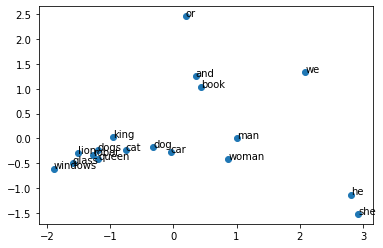

In [57]:
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(vectors), columns = list('xy'))
x = df2d['x']
y = df2d['y']
plt.scatter(x, y)
#Etiquetar los puntos
for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))
plt.show()

Haciendo lo mismo pra el modelo de google

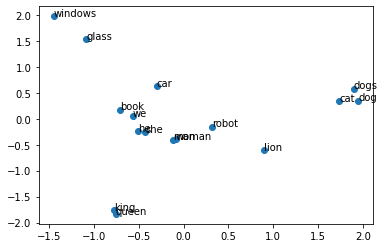

In [59]:
words = ['man', 'woman', 'dog', 'dogs', 'cat', 'lion', 'car', 'glass', 
         'robot', 'he', 'she', 'we', 'king', 'queen', 'windows', 'book']
vectors = []
for w in words:
    vectors.append(wv[w])

vectors = np.array(vectors)
vectors = vectors - vectors.mean()
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(vectors), columns = list('xy'))
x = df2d['x']
y = df2d['y']
plt.scatter(x, y)
#Etiquetar los puntos
for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))
plt.show()